<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## **Task 2**
#### 1. For the "Median value of owner-occupied homes" provide a boxplot

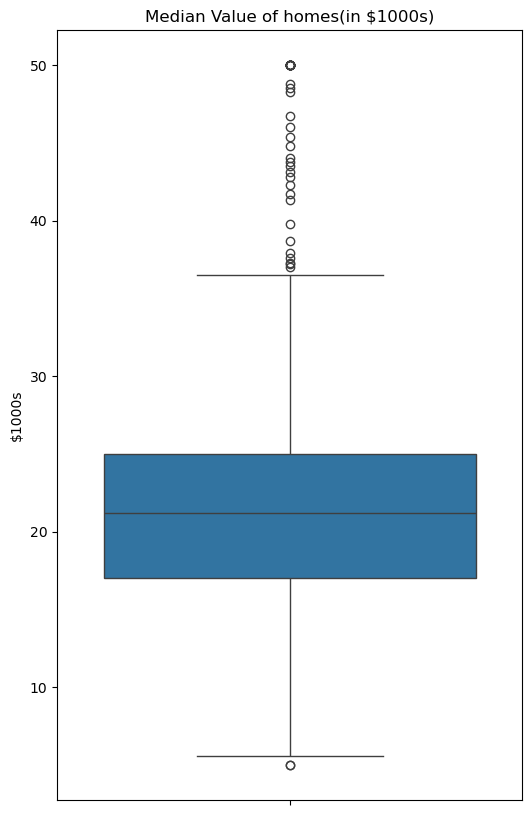

In [11]:
pyplot.figure(figsize=(6, 10))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median Value of homes(in $1000s)')
pyplot.ylabel('$1000s')
pyplot.show()

#### Note:
It looks like a quite narrow distribution around mean,with most of the outliers extending beyond the maximum. So most of the houses fall in a narrow band of values.

#### 2. Provide a  bar plot for the Charles river variable

Text(30.575617283950628, 0.5, 'How many homes?')

<Figure size 1000x600 with 0 Axes>

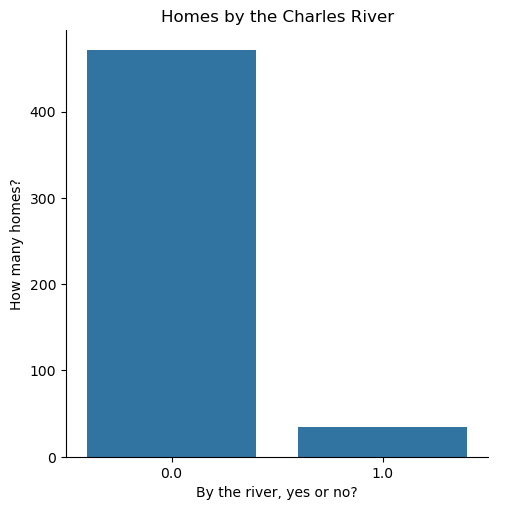

In [15]:
pyplot.figure(figsize=(10,6))
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Homes by the Charles River')
pyplot.xlabel('By the river, yes or no?')
pyplot.ylabel('How many homes?')

#### Note:
Most housing tracts are not by the Charles River.

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

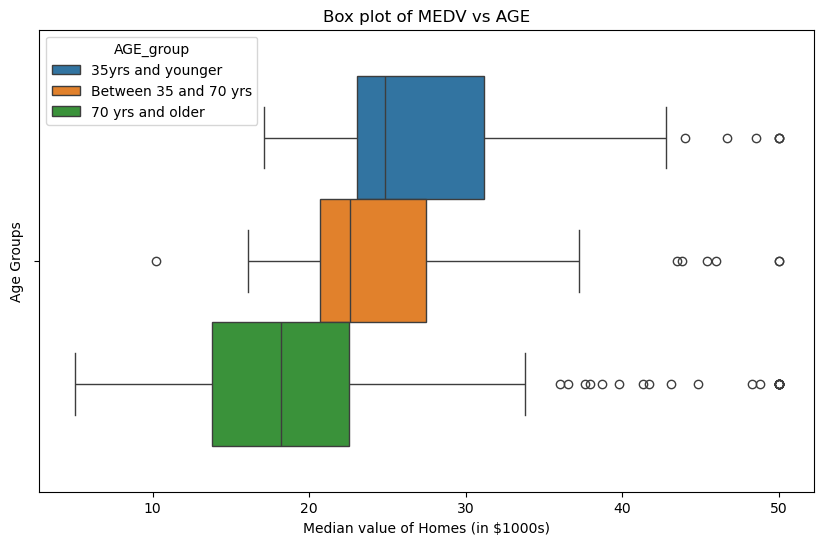

In [21]:
boston_df['AGE_group']= pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35yrs and younger','Between 35 and 70 yrs','70 yrs and older'])
pyplot.figure(figsize= (10, 6))
sns.boxplot(data=boston_df, hue='AGE_group', x='MEDV')
pyplot.title('Box plot of MEDV vs AGE')
pyplot.xlabel('Median value of Homes (in $1000s)')
pyplot.ylabel('Age Groups')
pyplot.show()

#### Note:
There is an apparent difference in Median values based on age. With younger having more value on average and as the homes get older they have a lower mean value, but older homes have more outliers extending beyond the maximum bound.

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

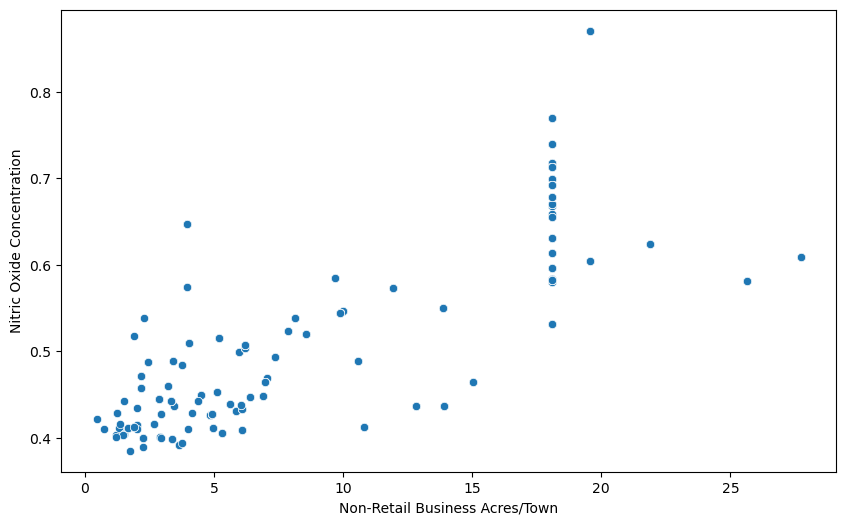

In [27]:
pyplot.figure(figsize=(10,6))
sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
pyplot.xlabel('Non-Retail Business Acres/Town')
pyplot.ylabel('Nitric Oxide Concentration')
pyplot.show()

#### Note:
Visually looks like there is a correlation between Nitric Oxide concentration and Non-retail business acres, with some sort of an anomoly in the data at around the value of 17 for INDUS, where INDUS remains constant even if Nitric Oxide concentration is increased or decreased.

#### 5. Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Total counts')

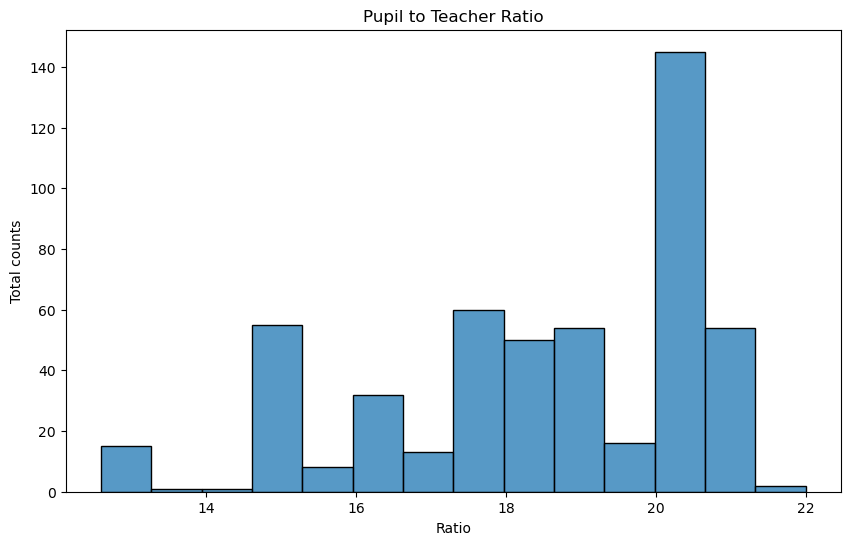

In [33]:
pyplot.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'])
pyplot.title('Pupil to Teacher Ratio')
pyplot.xlabel('Ratio')
pyplot.ylabel('Total counts')

#### Note:
By far most of the counts have the pupil to teacher ratio of slightly more than 20.

### Task 3: 
Use the appropriate tests to answer the questions provided.

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) 
   * Null hypnothesis: there is no significant difference in Median house values by the Charles river
   * Alternative Hypnothesis: there is a significant differenece in Median house values by the Charles river 

In [42]:
chas_1 = boston_df['MEDV'][boston_df['CHAS']== 1]
chas_0 = boston_df['MEDV'][boston_df['CHAS']== 0]
t_statistic, p_value = stats.ttest_ind(chas_1, chas_0)
print('T-statistic:', t_statistic, 'P-value:', p_value)
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject')

T-statistic: 3.996437466090509 P-value: 7.390623170519905e-05
Reject the null hypothesis


#### Conclusion: 
Given the p_value is <0.05 we reject the null hypothesis, there is a significant difference in the Median house values by Charles River

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Null hypothesis: All proportion of AGE does not affect the MEDV of housing 
* Alternative hypothesis: At least one mean is different for Median House values in each proportion of owner occupied units
* α = 0.05

In [108]:
#seperating into 3 age groups to perform a AVONA test
boston_df['AGE_group']= pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 yrs and younger','Between 35 and 70 yrs','70 yrs and older'])
thrityfive_lower = boston_df[boston_df['AGE_group'] == '35 yrs and younger']['MEDV']
thrityfive_seventy = boston_df[boston_df['AGE_group'] == 'Between 35 and 70 yrs']['MEDV']
seventy_older = boston_df[boston_df['AGE_group'] == '70 yrs and older']['MEDV']
#perfoming test
f_statistic, p_value = stats.f_oneway(thrityfive_lower, thrityfive_seventy, seventy_older)
print('F_statistic:', f_statistic, 'P_value:', p_value)
if p_value < 0.05:
    print('Reject the null hypothesis: at least one group is signifcanly different')
else:
    print('Fail to reject the null hypothesis: all groups are the same')

F_statistic: 36.40764999196599 P_value: 1.7105011022702984e-15
Reject the null hypothesis: at least one group is signifcanly different


#### Conclusion: 
Given the p_value is <0.05 we reject the null hypothesis and at least one of the means is different

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
    * Null Hypothesis: There is no correlation between Nitric Oxide concentrations and Non-retail Business Acres per town.
    * Alternative Hypothesis: There is a correlation between Nitric Oxide concentrations and Non-retail Business Acres per town.
    * α = 0.05

In [110]:
x= boston_df['NOX']
y= boston_df['INDUS']
correlation_coefficient, p_value = stats.pearsonr(x, y)
print('Pearson correlation coefficient:', correlation_coefficient, 'P_value:', p_value)
if p_value < 0.05:
    print('Reject the null hypothesis: There is a correlation')
else:
    print('Fail to reject the null hypothesis: There is no correlation')

Pearson correlation coefficient: 0.7636514469209162 P_value: 7.913361061232958e-98
Reject the null hypothesis: There is a correlation


#### Conclusion:
Given the p_value is less than 0.05 we can reject the null hypothesis, there is a correlation. Also given the Correlation coefficent being ~0.76 we can conclude it is a relatively strong correlation


#### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
    * Null Hypothesis: No correlation between Distance to employment centers and Median House Value
    * Alternative hypothesis: There is a correlation bewteen Distance between Employment centers and Median house value.
    * α = 0.05

In [58]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:59:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
Given the p_value is less than 0.05 we reject the null hypothesis, there is a correlation between DIS and MEDV but given the R-squared value is 0.062 the model only explains a small part of the correlation.